In [1]:
import base64
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from ohmysportsfeedspy import MySportsFeeds
import gmaps
import json

from config import api_key
from config import g_key

msf = MySportsFeeds(version="2.0")
msf.authenticate(api_key, "MYSPORTSFEEDS")

In [2]:
output = msf.msf_get_data(league='nfl',season='2019-2020-regular',feed='seasonal_player_stats',format='json')
player_list = output['playerStatsTotals']
player_list[0]

{'player': {'id': 6826,
  'firstName': 'Ameer',
  'lastName': 'Abdullah',
  'primaryPosition': 'RB',
  'jerseyNumber': 31,
  'currentTeam': {'id': 63, 'abbreviation': 'MIN'},
  'currentRosterStatus': 'ROSTER',
  'currentInjury': None,
  'height': '5\'9"',
  'weight': 203,
  'birthDate': '1993-06-13',
  'age': 26,
  'birthCity': 'Mobile, AL',
  'birthCountry': 'USA',
  'rookie': False,
  'highSchool': None,
  'college': 'Nebraska',
  'handedness': None,
  'officialImageSrc': 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/ABD647726.png',
  'socialMediaAccounts': []},
 'team': {'id': 63, 'abbreviation': 'MIN'},
 'stats': {'gamesPlayed': 16,
  'passing': {'passAttempts': 0,
   'passCompletions': 0,
   'passPct': 0.0,
   'passYards': 0,
   'passAvg': 0.0,
   'passYardsPerAtt': 0.0,
   'passTD': 0,
   'passTDPct': 0.0,
   'passInt': 0,
   'passIntPct': 0.0,
   'passLng': 0,
   'pass20Plus': 0,
   'pass40Plus': 0,
   'passSacks': 0,
   'passSackY': 0,
   '

In [3]:
# rb_name = []
# for i in range(0,  len(player_list)):
#     if player_list[i]['player']['primaryPosition'] == 'RB':
#         name = player_list[i]['player']['firstName'] + " " + player_list[i]['player']['lastName']
#         rb_name.append(name)
     
# rb_name

num_records = len(player_list)

stats_df = pd.DataFrame(columns=['Name', 'Position', 'Team', 'Age', 'birthCity', 'College',
                                   'passYards', 'passYPA', 'passTD', 'passInt', 'qbRating',
                                   'rushAttempts', 'rushYards', 'rushAverage', 'rushTD', 
                                   'Targets', 'Receptions', 'recYards', 'recAverage', 'recTD',
                                   'Tackles', 'Sacks', 'TFL', 'Interceptions', 'intTD', 'passesDefended', 'Safeties',
                                   'fumblesForced', 'fumbleTD'], index=range(0, num_records))
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,recTD,Tackles,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for index, row in stats_df.iterrows():
    
    try:
        stats_df.loc[index, 'Name'] = player_list[index]['player']['firstName'] + " " + player_list[index]['player']['lastName']
        stats_df.loc[index, 'Position'] = player_list[index]['player']['primaryPosition']
        stats_df.loc[index, 'Team'] = player_list[index]['team']['abbreviation']
        stats_df.loc[index, 'Age'] = player_list[index]['player']['age']
        stats_df.loc[index, 'birthCity'] = player_list[index]['player']['birthCity']
        stats_df.loc[index, 'College'] = player_list[index]['player']['college']
        stats_df.loc[index, 'passYards'] = player_list[index]['stats']['passing']['passYards']
        stats_df.loc[index, 'passYPA'] = player_list[index]['stats']['passing']['passYardsPerAtt']
        stats_df.loc[index, 'passTD'] = player_list[index]['stats']['passing']['passTD']
        stats_df.loc[index, 'passInt'] = player_list[index]['stats']['passing']['passInt']
        stats_df.loc[index, 'qbRating'] = player_list[index]['stats']['passing']['qbRating']
        stats_df.loc[index, 'rushAttempts'] = player_list[index]['stats']['rushing']['rushAttempts']
        stats_df.loc[index, 'rushYards'] = player_list[index]['stats']['rushing']['rushYards']
        stats_df.loc[index, 'rushAverage'] = player_list[index]['stats']['rushing']['rushAverage']
        stats_df.loc[index, 'rushTD'] = player_list[index]['stats']['rushing']['rushTD']
        stats_df.loc[index, 'Targets'] = player_list[index]['stats']['receiving']['targets']
        stats_df.loc[index, 'Receptions'] = player_list[index]['stats']['receiving']['receptions']
        stats_df.loc[index, 'recYards'] = player_list[index]['stats']['receiving']['recYards']
        stats_df.loc[index, 'recAverage'] = player_list[index]['stats']['receiving']['recAverage']
        stats_df.loc[index, 'recTD'] = player_list[index]['stats']['receiving']['recTD']
        stats_df.loc[index, 'Tackles'] = player_list[index]['stats']['tackles']['tackleTotal']
        stats_df.loc[index, 'Sacks'] = player_list[index]['stats']['tackles']['sacks']
        stats_df.loc[index, 'TFL'] = player_list[index]['stats']['tackles']['tacklesForLoss']
        stats_df.loc[index, 'Interceptions'] = player_list[index]['stats']['interceptions']['interceptions']
        stats_df.loc[index, 'intTD'] = player_list[index]['stats']['interceptions']['intTD']
        stats_df.loc[index, 'passesDefended'] = player_list[index]['stats']['interceptions']['passesDefended']
        stats_df.loc[index, 'Safeties'] = player_list[index]['stats']['interceptions']['safeties']
        stats_df.loc[index, 'fumblesForced'] = player_list[index]['stats']['fumbles']['fumForced']
        stats_df.loc[index, 'fumbleTD'] = player_list[index]['stats']['fumbles']['fumTD']
    
    except:
        pass
        
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,recTD,Tackles,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,1,7,0,0,0,0,0,0,0,0
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,Dave Zastudil,P,ARI,None,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,Isaac Zico,WR,ARI,23,None,Purdue,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,Frank Zombo,LB,KC,None,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
stats_df = stats_df[stats_df['Age'].notna()]
stats_df['Age'] = pd.to_numeric(stats_df['Age'])
stats_df = stats_df[stats_df['Age'] > 15]
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26.0,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,,,203
1,Oday Aboushi,G,DET,28.0,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2,Johnathan Abram,FS,OAK,23.0,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3,Sam Acho,LB,TB,31.0,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4,Andrew Adams,FS,TB,27.0,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Ronald Zamort,CB,NYG,28.0,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4714,Adam Zaruba,TE,PHI,29.0,None,None,0,0,0,0,...,0,0,0,0,0,0,0,,,0
4716,Elijah Zeise,LB,LAC,24.0,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4717,Isaac Zico,WR,ARI,23.0,None,Purdue,0,0,0,0,...,0,0,0,0,0,0,0,,,0


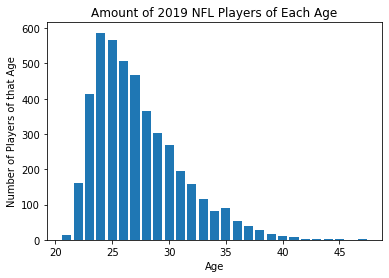

In [90]:
# groups by age
age_count = stats_df["Age"].value_counts()
age_count
# turns series into df
age_count = age_count.to_frame()
# resets index so age is a column
age_count = age_count.reset_index()
# renames columns
age_count = age_count.rename(columns={"index":"Age", "Age":"Number of Players of that Age"})
age_count
# sorts by age
age_count = age_count.sort_values("Age")
age_count


# plots and saves bar graph of how many players there are of each age
plt.bar(age_count["Age"], age_count["Number of Players of that Age"])
plt.xlabel('Age')
plt.ylabel('Number of Players of that Age')
plt.title("Amount of 2019 NFL Players of Each Age")
plt.savefig("Images/player_bar_plot.png")

In [5]:
stats_df['Lat'] = ""
stats_df['Lng'] = ""
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,,,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,Dave Zastudil,P,ARI,None,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4716,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4717,Isaac Zico,WR,ARI,23,None,Purdue,0,0,0,0,...,0,0,0,0,0,0,0,,,0
4718,Frank Zombo,LB,KC,None,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN


In [6]:
city_df = stats_df[stats_df['birthCity'].notna()]
city_df = city_df.reset_index(drop=True)
city_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,,,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4,Davante Adams,WR,GB,27,"Palo Alto, CA",Fresno State,0,0,0,0,...,0,0,0,0,0,0,0,,,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,Sam Young,OT,MIA,32,"Dayton, OH",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2839,Usama Young,DT,OAK,34,"Washington, DC",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2840,Christian Yount,G,CLE,31,"San Pedro, CA",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2841,Ishmael Zamora,WR,OAK,24,"Houston, TX",None,0,0,0,0,...,0,0,0,0,0,0,0,,,0


In [7]:
gmaps.configure(api_key=g_key)

In [8]:
for index, row in city_df.iterrows():
    try:
        target_city = city_df.loc[index, 'birthCity']
            
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target_city, g_key)

        geo_data = requests.get(target_url).json()

        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        city_df.loc[index, 'Lat'] = lat
        city_df.loc[index, 'Lng'] = lng
    
    except:
        pass
    
city_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,30.6954,-88.0399,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6782,-73.9442,NaN
2,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.7767,-96.797,NaN
3,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.4486,-84.4551,NaN
4,Davante Adams,WR,GB,27,"Palo Alto, CA",Fresno State,0,0,0,0,...,0,0,0,0,0,0,0,37.4419,-122.143,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,Sam Young,OT,MIA,32,"Dayton, OH",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.7589,-84.1916,NaN
2839,Usama Young,DT,OAK,34,"Washington, DC",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.9072,-77.0369,NaN
2840,Christian Yount,G,CLE,31,"San Pedro, CA",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7361,-118.292,NaN
2841,Ishmael Zamora,WR,OAK,24,"Houston, TX",None,0,0,0,0,...,0,0,0,0,0,0,0,29.7604,-95.3698,0


In [21]:
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])

city_df = city_df[city_df['Lat'].notna()]
city_df = city_df[city_df['Lng'].notna()]
city_df = city_df.reset_index(drop=True)
city_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,30.695366,-88.039891,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678178,-73.944158,NaN
2,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.776664,-96.796988,NaN
3,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.448644,-84.455087,NaN
4,Davante Adams,WR,GB,27,"Palo Alto, CA",Fresno State,0,0,0,0,...,0,0,0,0,0,0,0,37.441883,-122.143019,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,Sam Young,OT,MIA,32,"Dayton, OH",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.758948,-84.191607,NaN
2838,Usama Young,DT,OAK,34,"Washington, DC",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.907192,-77.036871,NaN
2839,Christian Yount,G,CLE,31,"San Pedro, CA",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.736062,-118.292246,NaN
2840,Ishmael Zamora,WR,OAK,24,"Houston, TX",None,0,0,0,0,...,0,0,0,0,0,0,0,29.760427,-95.369803,0


In [22]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(city_df[["Lat", "Lng"]])
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [71]:
college_df = stats_df[stats_df['College'].notna()]
college_df = college_df.reset_index(drop=True)
college_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,,,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,Roderick Young,DT,BUF,None,None,North Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3621,Trevon Young,LB,LA,25,None,Louisville,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3622,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN
3623,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN


In [72]:
for index, row in college_df.iterrows():
    try:
        target = college_df.loc[index, 'College']
            
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target, g_key)

        geo_data = requests.get(target_url).json()

        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        college_df.loc[index, 'Lat'] = lat
        college_df.loc[index, 'Lng'] = lng
    
    except:
        pass
    
college_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,41.4925,-99.9018,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4316,-78.6569,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.4552,-88.7944,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9686,-99.9018,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8077,-72.254,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,Roderick Young,DT,BUF,None,None,North Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.2075,-97.1526,NaN
3621,Trevon Young,LB,LA,25,None,Louisville,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.2527,-85.7585,NaN
3622,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.2827,-85.6147,NaN
3623,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.4406,-79.9959,NaN


In [74]:
college_df['Lat'] = pd.to_numeric(college_df['Lat'])
college_df['Lng'] = pd.to_numeric(college_df['Lng'])

college_df = college_df[college_df['Lat'].notna()]
college_df = college_df[college_df['Lng'].notna()]
college_df = college_df.reset_index(drop=True)
college_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng,totalYards
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,41.492537,-99.901813,203
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.431573,-78.656894,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.455174,-88.794377,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.968599,-99.901813,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.807741,-72.253980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,Roderick Young,DT,BUF,None,None,North Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.207488,-97.152586,NaN
3618,Trevon Young,LB,LA,25,None,Louisville,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.252665,-85.758456,NaN
3619,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.282671,-85.614674,NaN
3620,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.440625,-79.995886,NaN


In [75]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(college_df[["Lat", "Lng"]])
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
qb_df = stats_df[stats_df['Position'] == 'QB']
qb_df = qb_df[['Name', 'Position', 'Team', 'Age','passYards', 'passYPA', 'passTD', 'passInt', 'qbRating']]
qb_df = qb_df[qb_df['Age'].notna()]
qb_df = qb_df[qb_df['passYards'] > 0]
qb_df['production'] = qb_df['passYards'] + (qb_df['passTD'] * 70)

qb_df['Age'] = pd.to_numeric(qb_df['Age'])
qb_df['passYards'] = pd.to_numeric(qb_df['passYards'])
qb_df['passYPA'] = pd.to_numeric(qb_df['passYPA'])
qb_df['passTD'] = pd.to_numeric(qb_df['passTD'])
qb_df['passInt'] = pd.to_numeric(qb_df['passInt'])
qb_df['qbRating'] = pd.to_numeric(qb_df['qbRating'])
qb_df['production'] = pd.to_numeric(qb_df['production'])

qb_df = qb_df.sort_values("production", ascending=False)
qb_df

,Name,Position,Team,Age,passYards,passYPA,passTD,passInt,qbRating,production
2102,Jameis Winston,QB,TB,26,5109,8.2,33,30,84.3,7419
1538,Dak Prescott,QB,DAL,26,4901,8.2,30,11,99.7,7001
1644,Matt Ryan,QB,ATL,34,4466,7.2,26,14,92.1,6286
2092,Russell Wilson,QB,SEA,31,4111,8.0,31,5,106.3,6281
1606,Philip Rivers,QB,LAC,38,4615,7.8,23,20,88.5,6225
...,...,...,...,...,...,...,...,...,...,...
190,Tim Boyle,QB,GB,25,15,3.8,0,0,80.2,15
1814,Jarrett Stidham,QB,NE,23,14,3.5,0,1,18.8,14
1723,Trevor Siemian,QB,NYJ,28,3,0.5,0,0,56.2,3
176,Blake Bortles,QB,LA,27,3,1.5,0,0,56.2,3


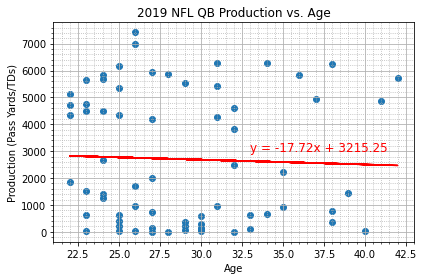

The r-squared is: 0.0014539331339513337
The correlation is: -0.04


<Figure size 432x288 with 0 Axes>

In [91]:
x_values = qb_df['Age']
y_values = qb_df['production']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("2019 NFL QB Production vs. Age")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33, 3000),fontsize=12,color="red")
plt.xlabel('Age')
plt.ylabel('Production (Pass Yards/TDs)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()



print(f"The r-squared is: {rvalue**2}")
print(f"The correlation is: {round(correlation[0],2)}")

plt.savefig("Images/qb_scatter_plot.png")

In [60]:
rb_df = stats_df[stats_df['Position'] == 'RB']
rb_df = rb_df[['Name', 'Position', 'Team', 'Age', 'rushAttempts', 'rushYards', 'rushAverage', 'rushTD',
              'Targets', 'Receptions', 'recYards', 'recAverage', 'recTD',]]
rb_df = rb_df[rb_df['Age'].notna()]
rb_df = rb_df[rb_df['rushYards'] > 0]
rb_df['production'] = rb_df['rushYards'] + rb_df['recYards'] + (rb_df['rushTD'] * 70) + (rb_df['recTD'] * 70)

rb_df['Age'] = pd.to_numeric(rb_df['Age'])
rb_df['rushAttempts'] = pd.to_numeric(rb_df['rushAttempts'])
rb_df['rushYards'] = pd.to_numeric(rb_df['rushYards'])
rb_df['rushAverage'] = pd.to_numeric(rb_df['rushAverage'])
rb_df['rushTD'] = pd.to_numeric(rb_df['rushTD'])
rb_df['Targets'] = pd.to_numeric(rb_df['Targets'])
rb_df['Receptions'] = pd.to_numeric(rb_df['Receptions'])
rb_df['recYards'] = pd.to_numeric(rb_df['recYards'])
rb_df['recAverage'] = pd.to_numeric(rb_df['recAverage'])
rb_df['recTD'] = pd.to_numeric(rb_df['recTD'])
rb_df['production'] = pd.to_numeric(rb_df['production'])

rb_df = rb_df.sort_values("production", ascending=False)
rb_df

,Name,Position,Team,Age,rushAttempts,rushYards,rushAverage,rushTD,Targets,Receptions,recYards,recAverage,recTD,production
1262,Christian McCaffrey,RB,CAR,23,287,1387,4.8,15,143,116,1005,8.7,4,3722
823,Derrick Henry,RB,TEN,26,303,1539,5.1,16,25,18,206,11.4,2,3005
1029,Aaron Jones,RB,GB,25,236,1084,4.6,16,69,49,474,9.7,3,2888
552,Ezekiel Elliott,RB,DAL,24,301,1357,4.5,12,71,54,419,7.8,2,2756
381,Dalvin Cook,RB,MIN,24,250,1135,4.5,13,63,53,519,9.8,0,2564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,Zach Zenner,RB,NO,28,1,1,1.0,0,2,1,6,6.0,0,7
1923,De'Lance Turner,RB,MIA,24,4,6,1.5,0,0,0,0,0.0,0,6
1499,Senorise Perry,RB,BUF,28,3,3,1.0,0,1,1,1,1.0,0,4
1362,Alfred Morris,RB,ARI,31,1,4,4.0,0,0,0,0,0.0,0,4


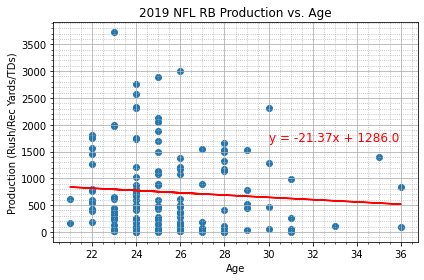

The r-squared is: 0.006198669022436674
The correlation is: -0.08


<Figure size 432x288 with 0 Axes>

In [92]:
x_values = rb_df['Age']
y_values = rb_df['production']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("2019 NFL RB Production vs. Age")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 1700),fontsize=12,color="red")
plt.xlabel('Age')
plt.ylabel('Production (Rush/Rec Yards/TDs)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()



print(f"The r-squared is: {rvalue**2}")
print(f"The correlation is: {round(correlation[0],2)}")

plt.savefig("Images/rb_scatter_plot.png")

In [68]:
wr_df = stats_df.loc[(stats_df['Position'] == 'WR') | (stats_df['Position'] == 'TE')]
wr_df = wr_df[['Name', 'Position', 'Team', 'Age', 'Targets', 'Receptions', 'recYards', 'recAverage', 'recTD']]
wr_df = wr_df[wr_df['Age'].notna()]
wr_df = wr_df[wr_df['recYards'] > 0]
wr_df['production'] = wr_df['recYards'] + (wr_df['recTD'] * 70)

wr_df['Age'] = pd.to_numeric(wr_df['Age'])
wr_df['Targets'] = pd.to_numeric(wr_df['Targets'])
wr_df['Receptions'] = pd.to_numeric(wr_df['Receptions'])
wr_df['recYards'] = pd.to_numeric(wr_df['recYards'])
wr_df['recAverage'] = pd.to_numeric(wr_df['recAverage'])
wr_df['recTD'] = pd.to_numeric(wr_df['recTD'])
wr_df['production'] = pd.to_numeric(wr_df['production'])

wr_df = wr_df.sort_values("production", ascending=False)
wr_df

,Name,Position,Team,Age,Targets,Receptions,recYards,recAverage,recTD,production
1880,Michael Thomas,WR,NO,27,186,149,1725,11.6,9,2355
691,Chris Godwin,WR,TB,24,119,86,1333,15.5,9,1963
696,Kenny Golladay,WR,DET,26,116,65,1190,18.3,11,1960
1127,Cooper Kupp,WR,LA,26,134,94,1162,12.4,10,1862
1471,DeVante Parker,WR,MIA,27,128,72,1202,16.7,9,1832
...,...,...,...,...,...,...,...,...,...,...
863,Krishawn Hogan,WR,NO,24,1,1,4,4.0,0,4
736,Xavier Grimble,TE,PIT,27,3,1,3,3.0,0,3
721,Cyril Grayson Jr.,WR,TB,26,1,1,3,3.0,0,3
1902,Eric Tomlinson,TE,NE,27,1,1,1,1.0,0,1


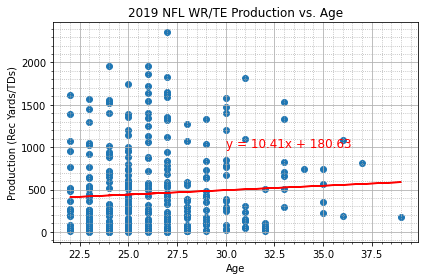

The r-squared is: 0.0040417909231381865
The correlation is: 0.06


<Figure size 432x288 with 0 Axes>

In [94]:
x_values = wr_df['Age']
y_values = wr_df['production']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("2019 NFL WR/TE Production vs. Age")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 1000),fontsize=12,color="red")
plt.xlabel('Age')
plt.ylabel('Production (Rec Yards/TDs)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()



print(f"The r-squared is: {rvalue**2}")
print(f"The correlation is: {round(correlation[0],2)}")

plt.savefig("Images/wr_scatter_plot.png")